
# **House Prices Model**

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Data Processing](#section3)<br>
4. [Splitting X and y into training and test datasets](#section4)<br>
5. [Linear Regression Model](#section3)<br>
6. [Random Forest Model](#section3)<br>
7. [Decision Tree Model](#section3)<br>
8. [Conclusion](#section3)<br>

## 1. Problem Statement

Given different parameters i.e. amenities, size, locality and so on..., make a model to predict price of house.

## 2. Data Loading and Description


Dataset contains details about houses like area, building type, street, neighbourhood, style, built year, interior, exterior, features, conditions and so on. SalePrice is given and we have to analyze that with given details.

__Importing Packages__

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Importing the Dataset

In [2]:
housedetails = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv')
housedetails.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Pandas profiling to get more insight

In [17]:
!pip install pandas-profiling --upgrade

     |████████████████████████████████| 266kB 2.7MB/s 
     |████████████████████████████████| 3.1MB 8.7MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 604kB 31.9MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 296kB 29.5MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=52b4f2dd6e21ab3ec9b45f60c784d671ebba3c1ad0514b23ff2ba4af52a7426f
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=90b613b05cace4cfdce68f9c554b6e45044b34249f7a66cc01b9226414cae029
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Uni

In [5]:
import pandas_profiling as profile
profile = housedetails.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="hd_before_preprocessing.html")

/usr/local/lib/python3.6/dist-packages/pandas_profiling/model/correlations.py:107: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  (include the error message: '{error}')"""


## 3. Data Processing

#### Check the info and shape of the dataset

In [5]:
housedetails.shape

(1460, 81)

In [9]:
housedetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Correlation before data processing

Text(0.5, 1.0, 'Correlation between features')

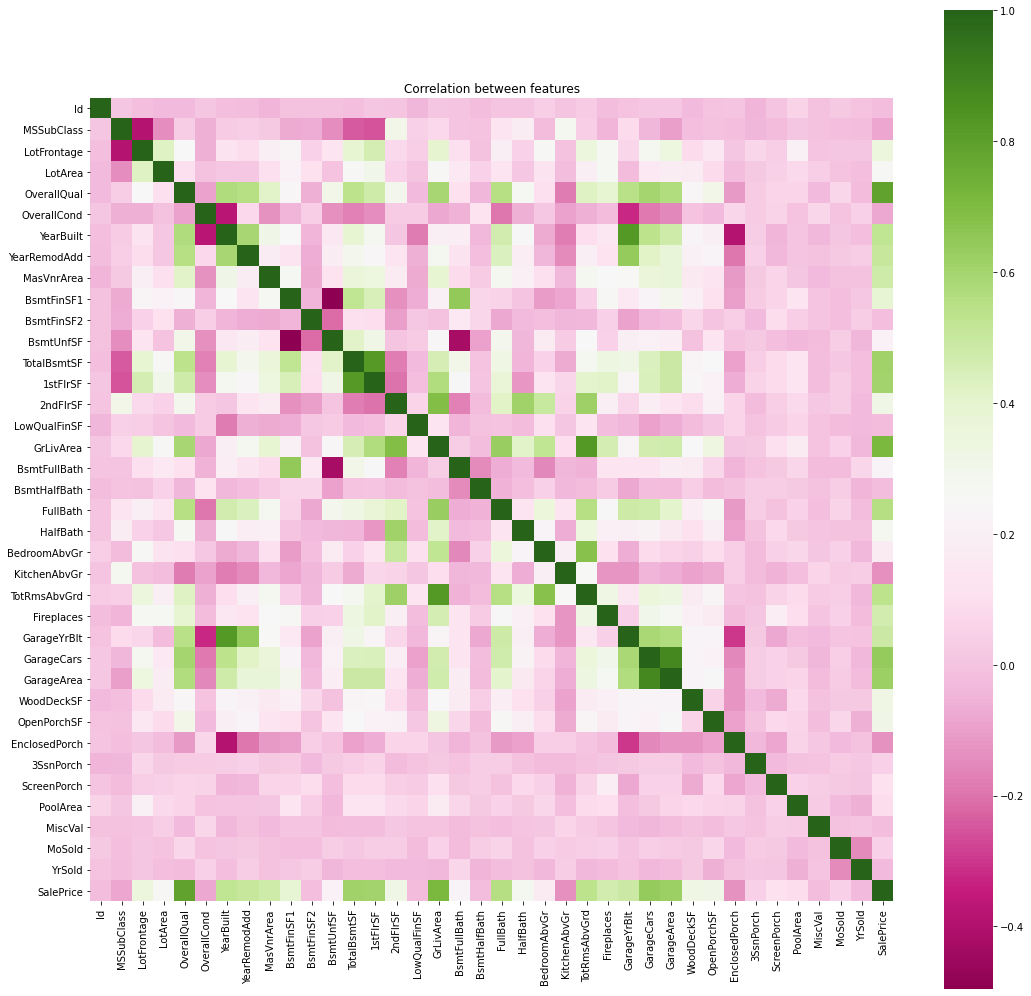

In [4]:
fig, ax = plt.subplots(figsize=(18,18))       
sns.heatmap( housedetails.corr(), ax=ax, square=True ,cmap='PiYG',linecolor ='black' );
plt.title('Correlation between features')

#### Observation: 

*   It looks like there isn't much correlation. Very few fields have high correlation
*   GarageCars and GarageAread are highly correalted so removing GarageCars Column
*   TotalBsmtSF and 1stFlrSf are highly correlated so removing 1stFlrSf
*   GarageYrBlt abd YearBuilt are highly correlated so removing GarageyrBlt



#### Removing unnecessary columns


We are removing these columns as either many columns are missing or they are not important for our model


In [4]:
housedetails.drop(['Id','Street','FireplaceQu','PoolQC','Fence','MiscFeature','Alley','Utilities','Neighborhood','LowQualFinSF','PoolArea','PoolQC','Fence','MiscFeature','MiscVal','OpenPorchSF','EnclosedPorch','EnclosedPorch','3SsnPorch','ScreenPorch','Condition1','Condition2','BldgType','BsmtFinSF1', 'BsmtFinSF2','BsmtHalfBath','HalfBath','GarageCars','1stFlrSF','GarageYrBlt','TotRmsAbvGrd','MasVnrType','MasVnrType','RoofMatl','Exterior1st','Exterior2nd','2ndFlrSF','LowQualFinSF','WoodDeckSF','GarageFinish','GarageQual','GarageCond','Electrical','SaleCondition'], 1, inplace=True)

#### Removing rows which has missing values as we have enough data


In [5]:
housedetails.dropna(inplace=True)

In [6]:
housedetails = housedetails[housedetails.MSSubClass < 100]

In [7]:
housedetails = housedetails[housedetails.LotArea < 20000]

In [8]:
housedetails = housedetails[housedetails.TotalBsmtSF < 2000]

In [9]:
housedetails = housedetails[housedetails.GrLivArea < 2000]

In [10]:
housedetails = housedetails[housedetails.BsmtFullBath < 2]

In [11]:
housedetails = housedetails[housedetails.FullBath < 3]

In [12]:
housedetails = housedetails[housedetails.KitchenAbvGr < 3]

In [13]:
housedetails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    774 non-null    int64  
 1   MSZoning      774 non-null    object 
 2   LotFrontage   774 non-null    float64
 3   LotArea       774 non-null    int64  
 4   LotShape      774 non-null    object 
 5   LandContour   774 non-null    object 
 6   LotConfig     774 non-null    object 
 7   LandSlope     774 non-null    object 
 8   HouseStyle    774 non-null    object 
 9   OverallQual   774 non-null    int64  
 10  OverallCond   774 non-null    int64  
 11  YearBuilt     774 non-null    int64  
 12  YearRemodAdd  774 non-null    int64  
 13  RoofStyle     774 non-null    object 
 14  MasVnrArea    774 non-null    float64
 15  ExterQual     774 non-null    object 
 16  ExterCond     774 non-null    object 
 17  Foundation    774 non-null    object 
 18  BsmtQual      774 non-null   

#### Pandas profiling after data processing

In [14]:
import pandas_profiling as profile
profile = housedetails.profile_report(title='Pandas Profiling after Data Preprocessing')
profile.to_file(output_file="hd_after_processing.html")

#### Correlation After data processing:

Text(0.5, 1.0, 'Correlation between features')

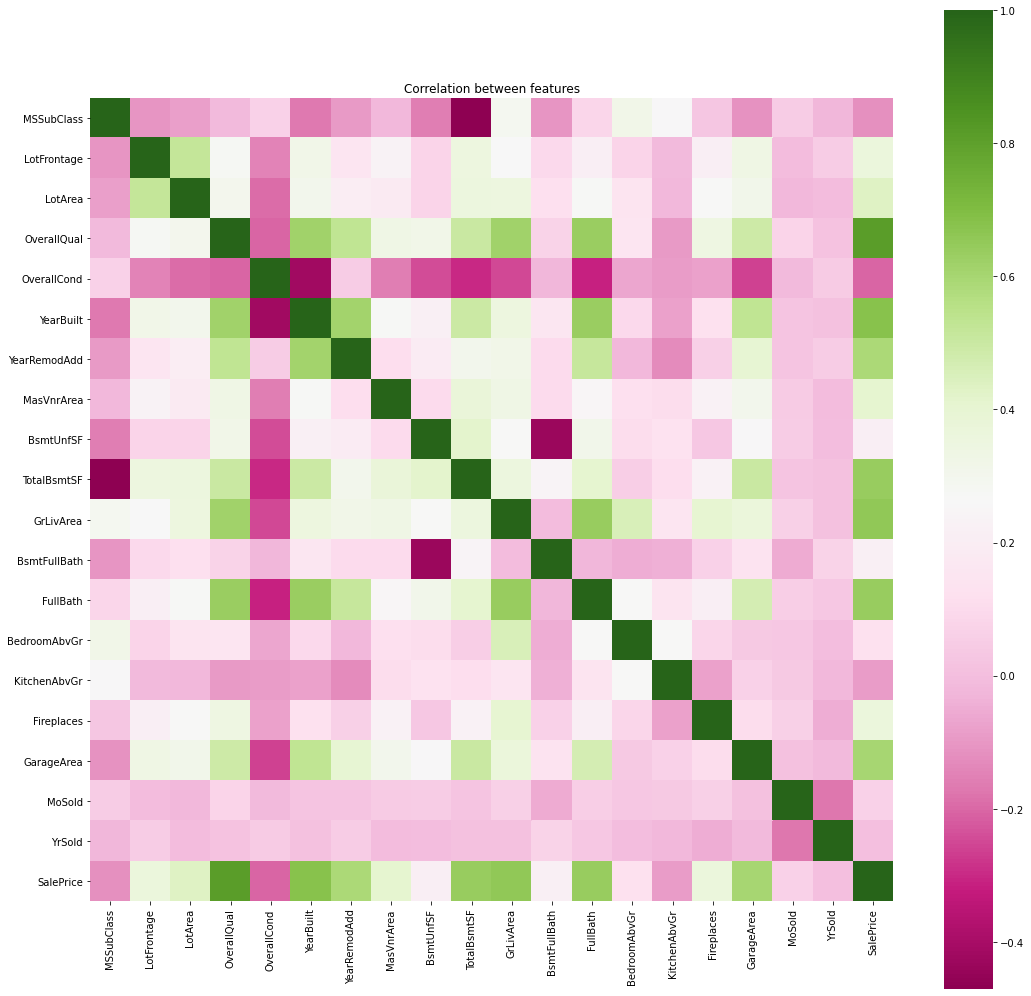

In [15]:
fig, ax = plt.subplots(figsize=(18,18))       
sns.heatmap( housedetails.corr(), ax=ax, square=True ,cmap='PiYG',linecolor ='black' );
plt.title('Correlation between features')

#### Observation: 

*   It looks like there isn't much correlation. 
*   After data processing there seems no issue of Multicollinearity




#### Target Variable Standardizing


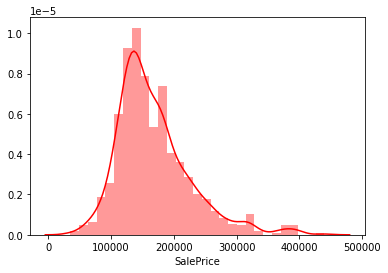

In [16]:
sns.distplot(housedetails['SalePrice'] ,color="r");

Plot looks right scewed so we will do transformation
#### Applying Log transformation

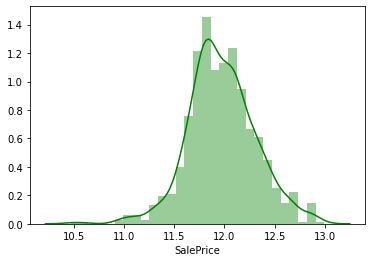

In [17]:
housedetails['SalePrice'] = np.log(housedetails['SalePrice'])
sns.distplot(housedetails['SalePrice'] ,color="g");


#### Replacing MsZoning 'C (all)' value to 'all' 

In [18]:
for i in housedetails['MSZoning']:
    if i=='C (all)':
        housedetails['MSZoning']=housedetails['MSZoning'].replace(i,'all')

#### Scaling Numerical Fields:

In [19]:
numFields = housedetails.select_dtypes(include=[np.number]).columns.values
numFields = numFields[numFields!='SalePrice'] 
print(numFields)

['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtUnfSF' 'TotalBsmtSF'
 'GrLivArea' 'BsmtFullBath' 'FullBath' 'BedroomAbvGr' 'KitchenAbvGr'
 'Fireplaces' 'GarageArea' 'MoSold' 'YrSold']


In [20]:
from sklearn.preprocessing import StandardScaler

for a in numFields:  
  scaler = StandardScaler().fit(housedetails[a].values.reshape(-1,1))
  housedetails[a] = scaler.transform(housedetails[a].values.reshape(-1,1))

#### Categorical features dummification:


In [21]:
categorical_f = housedetails.select_dtypes(exclude=[np.number]).columns.values

In [22]:
for cf in categorical_f:
  housedetails = pd.get_dummies(housedetails,prefix=[cf], columns = [cf], drop_first=True)


In [23]:
housedetails.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,MoSold,YrSold,SalePrice,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_all,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,...,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0.935147,-0.403908,-0.462686,0.837451,-0.613741,1.124407,0.891860,0.791312,-1.065572,-0.573915,0.972244,1.270773,1.064090,0.265424,-0.130701,-0.862541,0.398672,-1.623789,0.156404,12.247694,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,-0.886889,0.443620,-0.013512,0.031248,2.175117,0.237294,-0.348199,-0.535565,-0.750653,0.623194,-0.350618,-0.786922,1.064090,0.265424,-0.130701,0.802314,-0.091240,-0.501635,-0.590860,12.109011,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0.935147,-0.234403,0.630955,0.837451,-0.613741,1.058695,0.845932,0.561140,-0.398131,-0.385208,1.196658,1.270773,1.064090,0.265424,-0.130701,0.802314,0.732703,0.994571,0.156404,12.317167,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1.390656,-0.686418,-0.033041,0.837451,-0.613741,-1.766925,-0.623768,-0.535565,-0.149016,-0.868769,0.992914,1.270773,-0.930113,0.265424,-0.130701,0.802314,0.921988,-1.623789,-1.338125,11.849398,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
5,0.479638,0.726130,1.749985,-0.774955,-0.613741,0.795846,0.524435,-0.535565,-1.267685,-0.750827,-0.055337,1.270773,-0.930113,-3.075030,-0.130701,-0.862541,0.020104,1.368622,0.903669,11.870600,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


## 4. Splitting X and y into training and test datasets.

In [26]:
from sklearn.model_selection import train_test_split

hd_train, hd_test = train_test_split(housedetails, test_size = 0.2, random_state = 2)

In [27]:
X_train = hd_train.drop(['SalePrice'], 1)
y_train = hd_train['SalePrice']
X_test = hd_test.drop(['SalePrice'], 1)
y_test = hd_test['SalePrice']
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (619, 104)
y_train shape:  (619,)

Test cases as below
X_test shape:  (155, 104)
y_test shape:  (155,)


## 5. Linear Regression Model

In [28]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred_train = linreg.predict(X_train)

In [30]:
y_pred_test = linreg.predict(X_test)

#### Intercept and Coefficient:

In [31]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: 12.069839344582956
Coefficients: [-0.05832022  0.00759029  0.01631352  0.05959038  0.05037556  0.04465102
  0.01379348  0.0079018  -0.03496089  0.07199534  0.10348405  0.00566533
  0.00104364  0.00109679 -0.00684079  0.00938291  0.02212905  0.00475255
  0.00077983 -0.15543152 -0.07505016 -0.09722539 -0.49714719  0.00544738
 -0.15619231  0.00102813  0.03569849  0.08232476 -0.01908974  0.03546731
 -0.03775101 -0.1165968  -0.00477886  0.00710361 -0.05624881 -0.01764868
 -0.06890402  0.10281077  0.04403707  0.10004031  0.11589942 -0.02016328
 -0.06579604 -0.03768455 -0.00849205 -0.06803333 -0.04931946 -0.06055224
 -0.10585324 -0.07995022 -0.06342099 -0.00721341  0.01177048  0.00638909
 -0.19699514 -0.06149434 -0.02824648 -0.06991375  0.00819965 -0.07784247
  0.02105066  0.02386024 -0.02058359 -0.00318987 -0.01812881  0.00982294
 -0.00961774 -0.00919592 -0.00885497  0.00118926  0.08928468  0.03176563
  0.05210919  0.06995243  0.00975015  0.06033668  0.01616496 -0.01373893
 -0.060

#### Model Evaluation

Root Mean Squared Error (RMSE)

In [32]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE of the model is {}'.format(RMSE_train))

RMSE of the model is 0.09614206007375063


In [33]:
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE of the test model is {}'.format(RMSE_test))

RMSE of the test model is 0.11316412825395512


Rsquared value


In [34]:
R_squared_train = metrics.r2_score(y_train, y_pred_train)
R_squared_test = metrics.r2_score(y_test, y_pred_test)

print('R squared value of the model is {}'.format(R_squared_train))
print('R squared value of the model is {}'.format(R_squared_test))

R squared value of the model is 0.9159298041765246
R squared value of the model is 0.895759784401419


#### Linear Regression Model prediction result

Text(0.5, 1.0, 'LinearRegression Model')

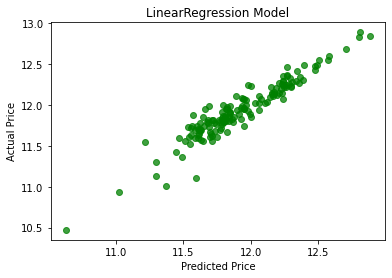

In [36]:
actual_values = y_test
plt.scatter(y_pred_test, actual_values, alpha=.75,
            color='g') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('LinearRegression Model')

With plot it is clear that predicted price is very close to actual. RMSE and R-square value is also as expected.

## 6. Random forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
y_pred_train_rf=rf.predict(X_train)

In [40]:
y_pred_test_rf = rf.predict(X_test)

#### Model Evaluation

Root Mean Squared Error (RMSE)

In [41]:
RMSE_train_rf = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_rf))
print('RMSE value of the model is {}'.format(RMSE_train_rf))

RMSE value of the model is 0.048604375877285895


In [42]:
RMSE_test_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_rf))
print('RMSE value of the model is {}'.format(RMSE_test_rf))

RMSE value of the model is 0.1535064363563991


Rsquared value

In [43]:
R_squared_train_rf = metrics.r2_score(y_train, y_pred_train_rf)
print('R squared value of the model is {}'.format(R_squared_train_rf))


R squared value of the model is 0.9785134863715854


In [44]:
R_squared_test_rf = metrics.r2_score(y_test, y_pred_test_rf)
print('R squared value of the model is {}'.format(R_squared_test_rf))

R squared value of the model is 0.8081901455220155


#### Random Forest prediction result

Text(0.5, 1.0, 'LinearRegression Model')

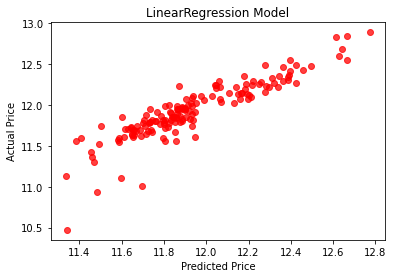

In [45]:
actual_values = y_test
plt.scatter(y_pred_test_rf, actual_values, alpha=.75,
            color='r') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('LinearRegression Model')

## 7. Decision tree

In [46]:
from sklearn.tree import DecisionTreeRegressor  
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [47]:
y_pred_train_dt=dt.predict(X_train)

In [48]:
y_pred_test_dt = dt.predict(X_test)

#### Model Evaluation

Root Mean Squared Error (RMSE)

In [49]:
RMSE_train_dt = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_dt))
print('RMSE of the model is {}'.format(RMSE_train_dt))

RMSE of the model is 3.450185788756449e-05


In [50]:
RMSE_test_dt = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_dt))
print('RMSE value of the model is {}'.format(RMSE_test_dt))

RMSE value of the model is 0.24038441333457103


Rsquared value

In [51]:
R_squared_train_dt = metrics.r2_score(y_train, y_pred_train_dt)
print('R squared value of the model is {}'.format(R_squared_train_dt))

R squared value of the model is 0.9999999891731984


In [52]:
R_squared_test_dt = metrics.r2_score(y_test, y_pred_test_dt)
print('R squared value of the model is {}'.format(R_squared_test_dt))

R squared value of the model is 0.5296400395838612


## 8. Conclusion



*   Linear Regression model predicted best results with R squared value of Training set as **0.9159298041765246** and R squared value of Test Set as **0.895759784401419**
*   Since the difference in R squared values for training and test is very small, it indicates that our model is not overfitting on the training set and is generalizing well on the test set.
* Random forest were also close with R Squared value of Test Set close to **0.80**
* Decision Tree tried to overfit and R squared value of Test Set is **0.5296400395838612**
